
# 🩺 Heart Attack Risk Levels — Data Analysis Project

**Author:** Christine Polly Paul  
**Date:** August 2025  
**Data Source:** https://www.kaggle.com/datasets/mostafamohamed1112/heart-attack-risk-levels-dataset    

## 📌 Project Overview
This project explores and analyzes the *Heart Attack Risk Levels* dataset to uncover patterns, relationships, and insights that can help understand cardiovascular risk factors.  
The goal is to clean, visualize, and interpret the dataset to provide meaningful conclusions.  


## 🎯 Objectives
- Import and explore the dataset
- Perform data cleaning and preprocessing
- Conduct exploratory data analysis (EDA)
- Visualize key trends and relationships
- Summarize findings



# Step 1 — Import Required Libraries
We will use Pandas, NumPy, Matplotlib, and Seaborn for data handling and visualization.

In [90]:
# Load dataset
import numpy as np  # NumPy — used for numerical computations, arrays, and linear algebra operations.
import pandas as pd  # Pandas — used for data manipulation, cleaning, and reading/writing datasets (e.g., CSV files).
import matplotlib.pyplot as plt  # Matplotlib — used for creating static, interactive, and animated visualizations.
import seaborn as sns  # Seaborn — built on Matplotlib, used for creating attractive and informative statistical plots easily.

# Step 2 — Load the Dataset
Load the dataset into a Pandas DataFrame for analysis.

In [91]:
df = pd.read_csv('Heart_Attack_Risk_Levels_Dataset.csv')
print('Dataset loaded — shape:', df.shape)
df.head()

Dataset loaded — shape: (1319, 11)


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor
3,66,1,70,120,55,270.0,13.87,0.122,positive,High,Immediate medical attention
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate,Monitor closely and consult doctor


# Step 3 — Explore the Dataset
Understand the basic structure, size, and features of the dataset.

In [92]:
# Data quality checks
print('Column names:', list(df.columns))
print('\nData types:\n', df.dtypes)
print('\nMissing values per column:\n', df.isnull().sum())
print('\nDuplicate rows:\n', df.duplicated().sum())
print('\nBasic descriptive stats:\n', df.describe(include='all').T)

Column names: ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result', 'Risk_Level', 'Recommendation']

Data types:
 Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
Risk_Level                   object
Recommendation               object
dtype: object

Missing values per column:
 Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
Risk_Level                  0
Recommendation              0
dtype: int64

Duplicate rows:
 0

Basi

---
**Insight:**  
The dataset does not appear to have missing values.  

**Gender** — Binary indicator:  
- `1` = Male  
- `0` = Female  
Gender is a relevant factor in heart disease, with risk profiles varying by sex and age.  

**Result** — Classification of the patient's condition:  
- `positive` = Heart attack occurred  
- `negative` = No heart attack detected  
This is the **target label** for classification.  

**Risk_Level** — Categorical assessment of the patient's risk:  
- Low  
- Moderate  
- High
---

## *✅ Normal Human Biomarker Ranges*


| **Feature**                    | **Normal Range**                            | **Clinical Note**                                                                |
| ------------------------------ | ------------------------------------------- | -------------------------------------------------------------------------------- |
| **Heart rate**                 | **60–100 bpm**                              | Resting heart rate. <60 = bradycardia, >100 = tachycardia.                       |
| **Systolic BP**                | **90–120 mmHg**                             | Pressure when heart beats. >130 = hypertension (Stage 1).                        |
| **Diastolic BP**               | **60–80 mmHg**                              | Pressure between beats. >80 = elevated; >90 = Stage 1 hypertension.              |
| **Blood sugar (fasting)**      | **70–99 mg/dL**                             | 100–125 = prediabetes; ≥126 = diabetes (fasting values).                         |
| **CK-MB (Creatine Kinase MB)** | **<3–5 ng/mL**                              | >5–10 suggests possible heart muscle damage (e.g., MI).                          |
| **Troponin**                   | **<0.01–0.04 ng/mL**<br>(i.e., <10–40 ng/L) | >0.04–0.1 = concerning; >0.1 = very likely myocardial injury (depends on assay). |



## 🔬 Notes:
*Heart rate and BP vary with age, activity, and health status.
CK-MB and Troponin are cardiac biomarkers — elevated levels typically indicate heart muscle injury, such as a heart attack.
Troponin is more specific and sensitive than CK-MB for detecting myocardial infarction.*




In [93]:
# Aggregate statistics by target
agg = (
    df.groupby('Risk_Level')
      [df.select_dtypes(include='number')
         .columns
         .drop(['Gender', 'Heart rate'])
      ]
      .agg(['mean', 'median', 'count'])
      .T  # Transpose for better readability
)

agg

Risk_Level                             High         Low    Moderate
Age                      mean     58.772167   52.141818   51.969828
                         median   60.000000   52.000000   52.000000
                         count   812.000000  275.000000  232.000000
Systolic blood pressure  mean    126.645320  113.629091  145.060345
                         median  122.000000  116.000000  150.000000
                         count   812.000000  275.000000  232.000000
Diastolic blood pressure mean     72.130542   67.669091   78.206897
                         median   71.000000   68.000000   78.000000
                         count   812.000000  275.000000  232.000000
Blood sugar              mean    144.650246  115.570909  190.399569
                         median  116.000000  105.000000  169.000000
                         count   812.000000  275.000000  232.000000
CK-MB                    mean     23.211220    2.617978    2.497216
                         median    3.760000    2.260000    2.330000
                         count   812.000000  275.000000  232.000000
Troponin                 mean      0.582232    0.006680    0.006353
                         median    0.044500    0.006000    0.005500
                         count   812.000000  275.000000  232.000000

---
**Observation:**  *Based on normal human range and the range based on the dataset below points are higlighted*

- **CK-MB** and **Troponin** are the most distinct biomarkers for identifying **High risk** patients — both far exceed critical levels only in this group.  
- **Moderate risk** group appears more severe than **High risk** in **blood sugar** and **systolic BP**, suggesting that the risk classification may weigh heart injury markers more heavily than metabolic or blood pressure levels.  
- **Low risk** group mostly falls within or close to normal ranges across all biomarkers.  
- **Age** contributes to risk but is less decisive than biochemical markers.
---

## *✅ Show Skewness in a Table Format*

In [94]:
#🔹 Step 1: Calculate Skewness
skew_df = df.skew(numeric_only=True).to_frame(name='Skewness')

#🔹 Step 2: Add Mean and Median
skew_df['Mean'] = df.mean(numeric_only=True)
skew_df['Median'] = df.median(numeric_only=True)

#🔹 Step 3: Add Interpretation (optional, manual)
#You can add basic interpretation logic like this:

def interpret_skew(val):
    if val > 1:
        return 'Highly right-skewed'
    elif val > 0.5:
        return 'Moderately right-skewed'
    elif val > -0.5:
        return 'Symmetrical'
    elif val > -1:
        return 'Moderately left-skewed'
    else:
        return 'Highly left-skewed'

skew_df['Interpretation'] = skew_df['Skewness'].apply(interpret_skew)

#🔹 Step 4: Rearranged Output
# Now you can display the table like this:
display(skew_df[['Mean', 'Median', 'Skewness', 'Interpretation']])

,Mean,Median,Skewness,Interpretation
Age,56.193328,58.000,-0.238356,Symmetrical
Gender,0.659591,1.000,-0.674363,Moderately left-skewed
Heart rate,78.336619,74.000,18.247720,Highly right-skewed
Systolic blood pressure,127.170584,124.000,0.685246,Moderately right-skewed
Diastolic blood pressure,72.269143,72.000,0.489202,Symmetrical
Blood sugar,146.634344,116.000,1.933475,Highly right-skewed
CK-MB,15.274306,2.850,4.978095,Highly right-skewed
Troponin,0.360942,0.014,5.799107,Highly right-skewed


# Step 4 — Visualize the Data

Use visualization to gain insights:

---
## *✅ Histogram :*
*A histogram is a type of plot that shows the distribution of a numeric variable by dividing the data into intervals (called bins) and counting how many values fall into each bin.*

**What Does a Histogram Show?**   
- Shape of the distribution (e.g., normal, skewed, bimodal)  
- Center (e.g., where most values cluster)  
- Spread (e.g., how wide the range of values is)  
- Outliers (extremely high or low values)  
- Frequency (how often each range of values occurs)  

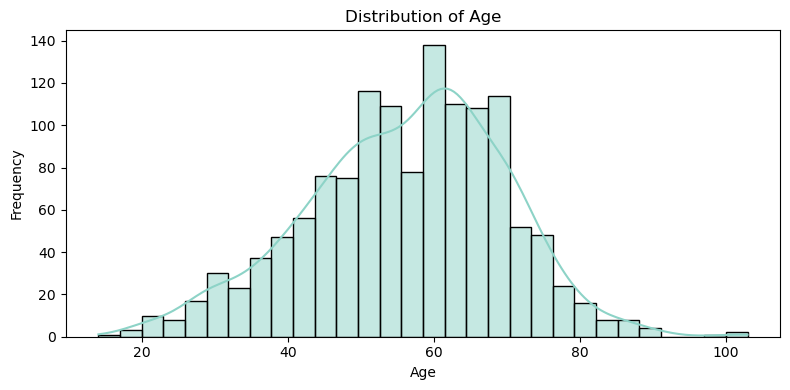

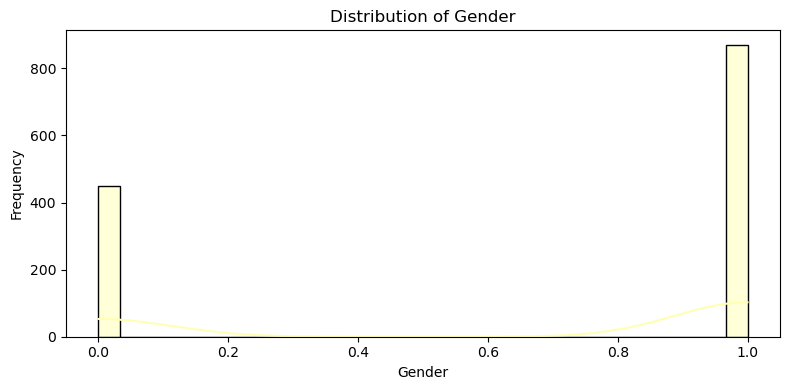

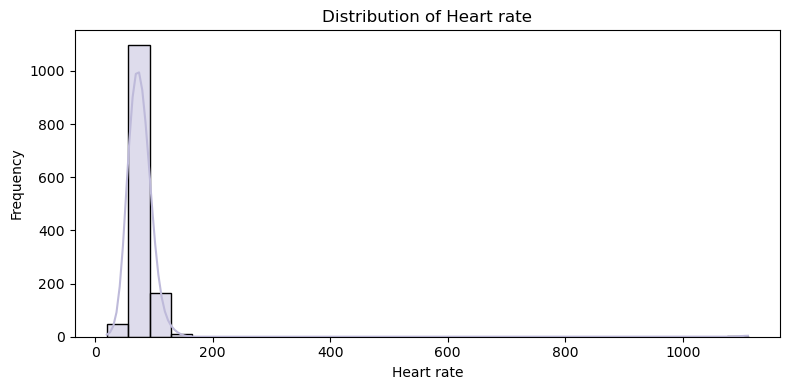

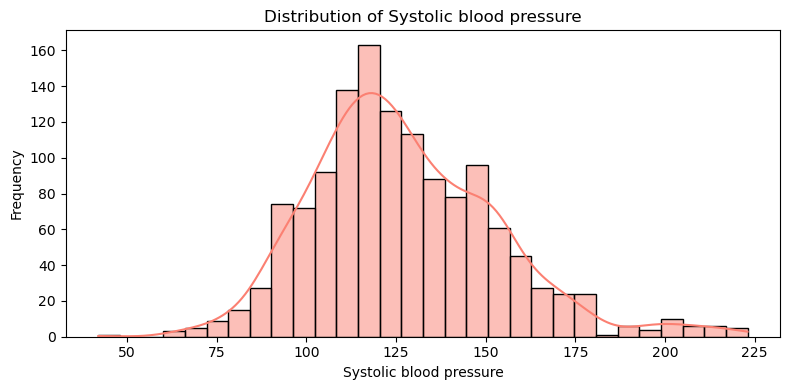

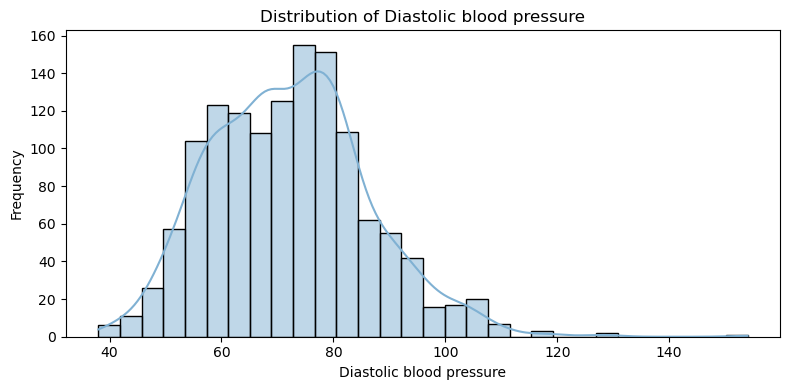

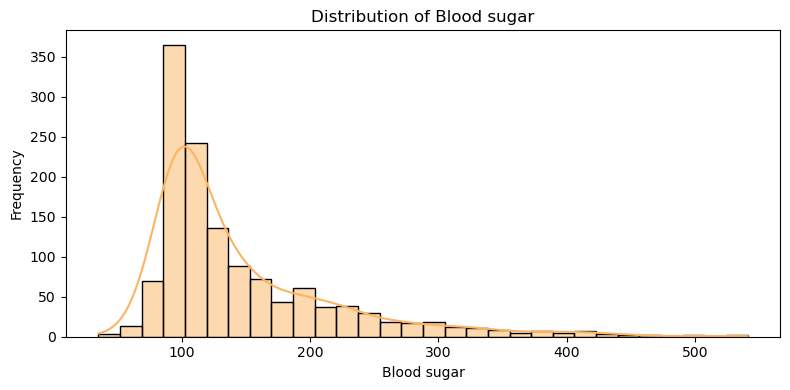

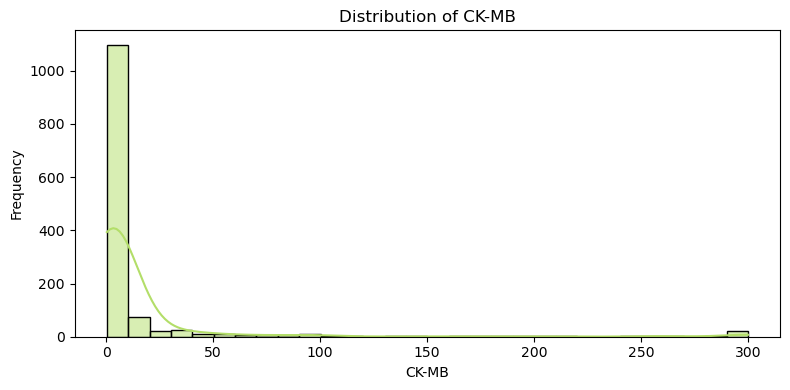

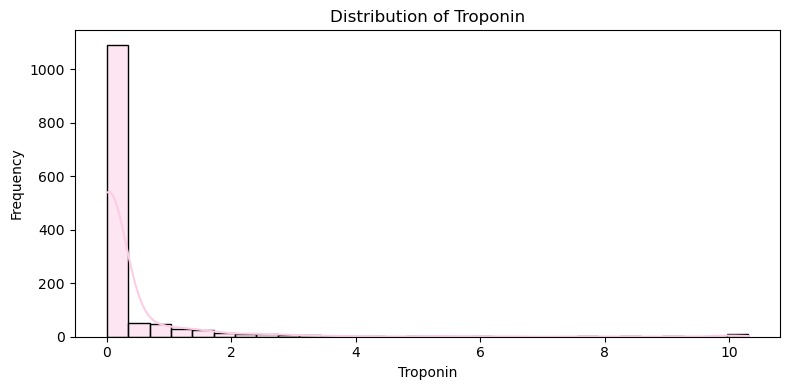

In [95]:
# Visualize distributions of numeric fields to gain insights.
num_cols = df.select_dtypes(include='number').columns

colors = sns.color_palette("Set3", n_colors=len(num_cols))

for i, col in enumerate(num_cols):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color=colors[i])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
#bins=30: splits data into 30 intervals
#kde=True: adds a smooth line to show the density estimate (optional)

---
**Observation:** *The above distribution has been display for all the factors considered as a risk factor.*

*Age Distribution*
- Appears roughly normal (bell-shaped) with most individuals between **50–70 years old**.  
- Peak frequency is around **age 60**.  
- Few individuals are below 20 or above 90.  

*Gender Distribution*
- Encoded as binary (**0** and **1**).  
- Frequency of **1** is much higher than **0**, indicating **imbalance** in gender representation.  

*Heart Rate Distribution*
- Mostly concentrated between **50–120 bpm**.  
- Extreme outliers above **200 bpm**, going as high as **1000+** (likely data entry errors).  

*Systolic Blood Pressure Distribution*
- Slightly **right-skewed**.  
- Most values between **100–150 mmHg**, peaking around **120 mmHg**.  
- Some extreme outliers above **200 mmHg**.  

*Blood Sugar Distribution*
- Strongly **right-skewed**.  
- Most values between **80–150 mg/dL**.  
- Extreme outliers above **500 mg/dL**.  

*CK-MB (Creatine Kinase-MB) Distribution*
- Very **right-skewed**.  
- Majority of values close to **0–10**.  
- Extreme outliers up to **~300**.
---


---
## *✅ Violin Plot :*
*A data visualization that shows the distribution of a dataset, combining features of a box plot and a density plot.*

### *What is KDE?*
KDE stands for Kernel Density Estimation.
It’s a smoothed version of a histogram that shows the probability distribution of a continuous variable.

### *What does KDE do?*
It estimates the "shape" of the data distribution.
Instead of showing bars like a histogram, it draws a smooth curve.
Helps you visually understand where values are concentrated, whether the distribution is skewed, and if there are multiple peaks.

### *Key Features* 
Shape: Looks like a violin — wider sections mean more data points at that value.  
Center Line: Usually marks the median.  
Box Inside: Shows the interquartile range (IQR).  
Width: Represents the probability density (how frequent values are at that level).  

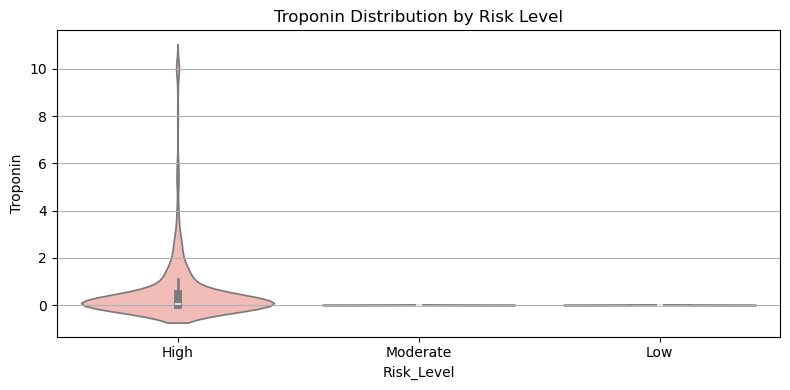

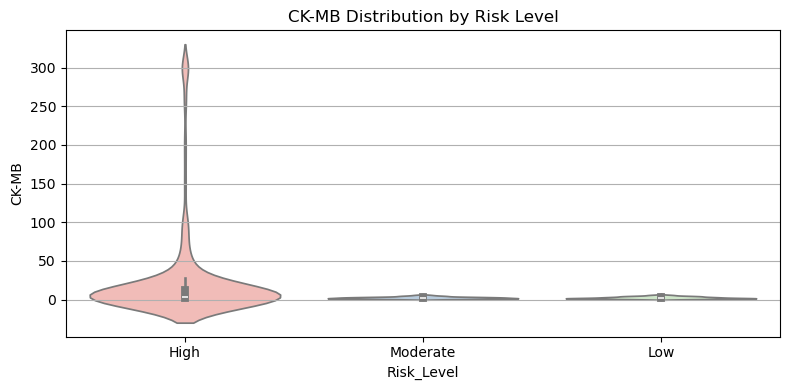

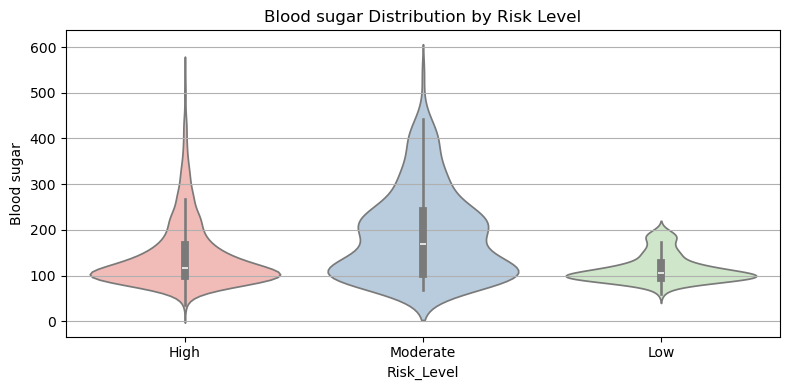

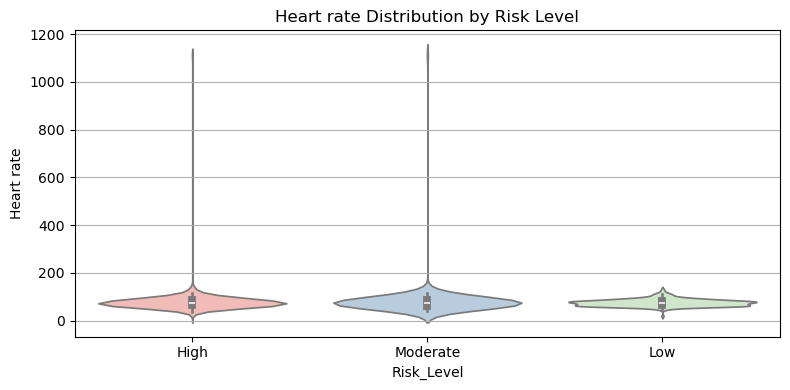

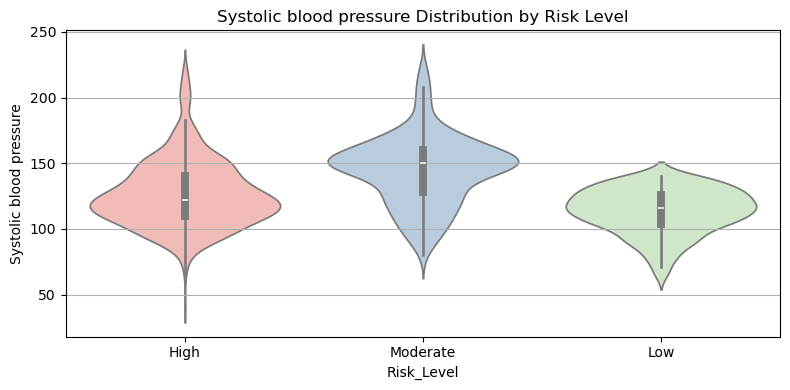

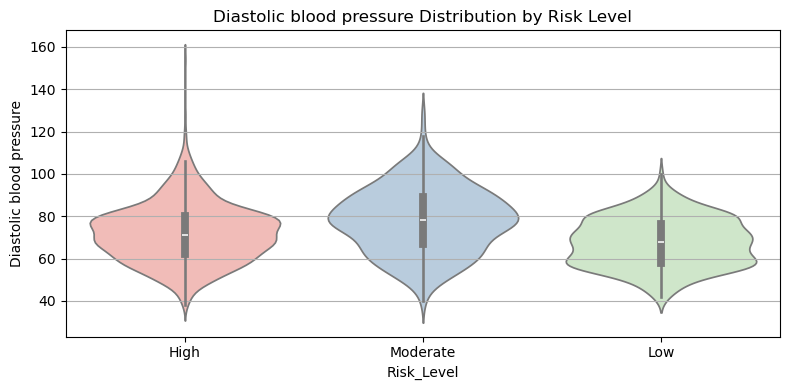

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure Risk_Level is ordered correctly
df['Risk_Level'] = pd.Categorical(df['Risk_Level'], categories=['High', 'Moderate', 'Low'], ordered=True)


# List of biomarkers to include
biomarkers = ['Troponin', 'CK-MB', 'Blood sugar', 'Heart rate', 
              'Systolic blood pressure', 'Diastolic blood pressure']

for biomarker in biomarkers:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=df, x='Risk_Level', y=biomarker, hue='Risk_Level', palette='Pastel1', legend=False)
    plt.title(f'{biomarker} Distribution by Risk Level')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

---
**Observation:**

- *Blood Sugar*:  
  High and moderate risk groups tend to have higher and more variable blood sugar levels than the low-risk group.

- *Heart Rate*:  
  High and moderate risk groups show abnormal heart rate spikes, suggesting instability or acute stress responses.

- *Troponin*:  
  Elevated troponin is mostly seen in high-risk patients, indicating possible cardiac injury or myocardial infarction.

- *CK-MB*:  
  High CK-MB levels are predominantly seen in high-risk patients, reinforcing the cardiac event correlation.

- *Blood Pressure*:  
  Elevated systolic and diastolic blood pressure are more common in moderate and high-risk groups.  
  Low-risk individuals tend to have better blood pressure control.
---

---
## *✅ Box Plot :*
A box plot (also called a box-and-whisker plot) is a graphical representation used to summarize the distribution of a numeric variable.

**What Does a box plot shows?**

- Minimum (excluding outliers)
- First Quartile (Q1) – 25% of the data falls below this value
- Median (Q2) – the middle value (50th percentile)
- Third Quartile (Q3) – 75% of the data falls below this value
- Maximum (excluding outliers)
- Outliers – data points that fall significantly outside the typical range


       ●      ← Outlier
       
┌────┴────┐   
|`            `|    ← Box (Q1 to Q3)  
|`       ┼      `|    ← Median (Q2)  
|`            `|   
└────┬────┘     
          




- The **box** represents the **interquartile range (IQR)**, which contains the middle 50% of the data.
- The **line inside the box** is the **median**.
- The **whiskers** extend to the smallest and largest non-outlier values.
- **Outliers** are plotted as individual dots (●).

**Explanation of the Plot:**    
You're visualizing Troponin & CK-MB levels grouped by Risk Level (Low, Moderate, High), and the boxplot shows:

- Box (interquartile range) → 25th to 75th percentile
- Line inside box → median (50th percentile)
- “Whiskers” → extend up to 1.5 × IQR (interquartile range)
- Circles (the points you're asking about) → outliers (values above the whisker range)

**Why are there outliers?**  
In medical datasets like this, Troponin & CK-MB can spike sharply during a heart attack, which is why the High risk group shows:

Box at lower Troponin & CK-MB levels.  
- *Many dots above = patients with very elevated Troponin & CK-MB levels. This is expected and clinically relevant — high Troponin & CK-MB is a strong indicator of cardiac damage.*  
- *Lots of outliers in the Blood sugar plotting indicates many individuals in High risk group had spikes, possibly acute stress-related hyperglycemia.*

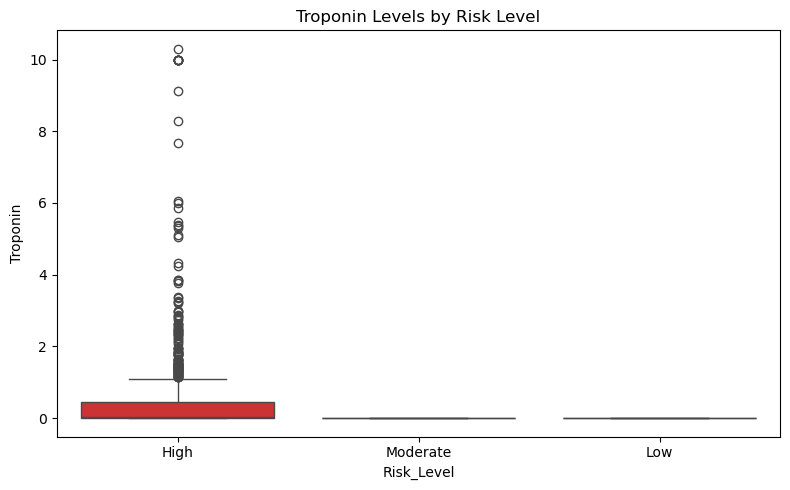

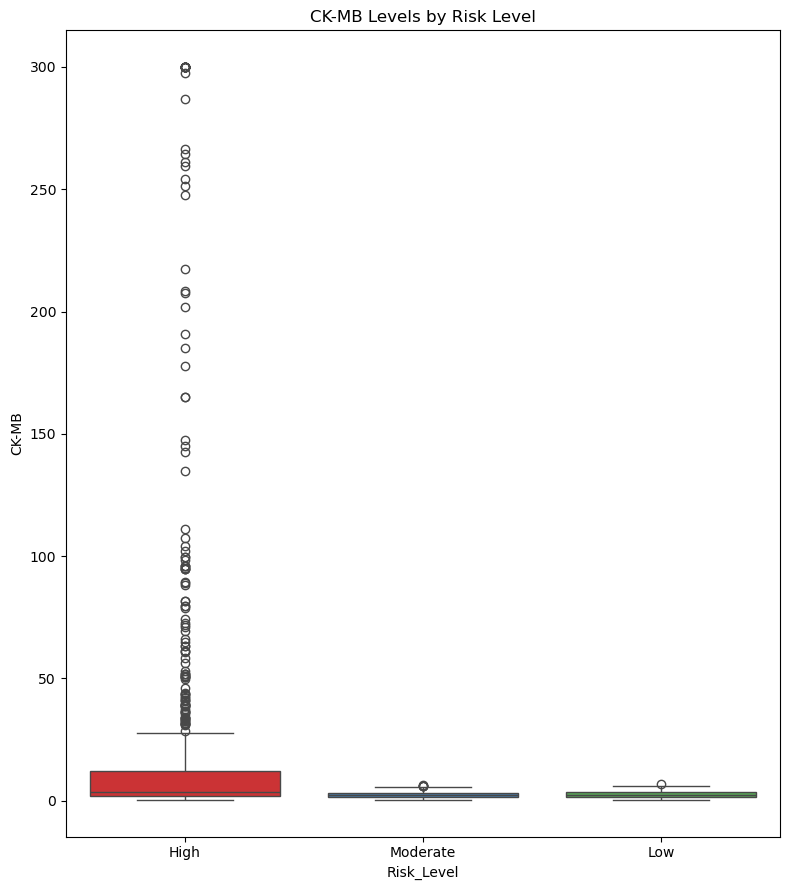

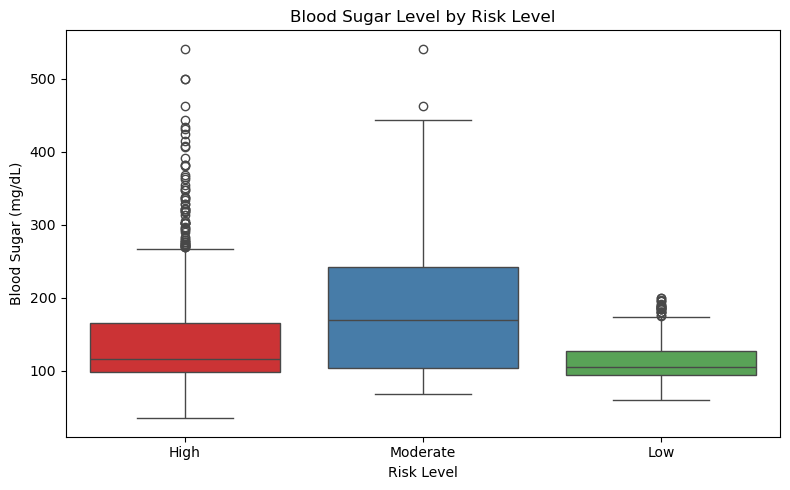

In [97]:
# Boxplots for Distribution Insight

#1. Troponin vs. Risk_Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Risk_Level', y='Troponin', data=df, palette='Set1', hue='Risk_Level', dodge=False, legend=False)
plt.title('Troponin Levels by Risk Level')
plt.tight_layout()
plt.show()

#2. CK-MB vs. Risk_Level
plt.figure(figsize=(8, 9))
sns.boxplot(x='Risk_Level', y='CK-MB', data=df, palette='Set1', hue='Risk_Level', dodge=False, legend=False)
plt.title('CK-MB Levels by Risk Level')
plt.tight_layout()
plt.show()

#3. Blood sugar vs. Risk_Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Risk_Level', y='Blood sugar', data=df, palette='Set1', hue='Risk_Level', dodge=False, legend=False)
plt.title('Blood Sugar Level by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Blood Sugar (mg/dL)')
plt.tight_layout()
plt.show()

# Step 4 — Summarize findings

*✅ 1. “Which biomarker is most predictive of a heart attack?”*  
*✅ 2.Does the distribution of a numeric variable (e.g., Troponin, Blood sugar, etc.) differ significantly across the three Risk_Level groups?*  
*✅ 3. “Do males and females present different risk patterns even at similar biomarker levels?”*


---
## ✅ 1. Which biomarker is most predictive of a heart attack?

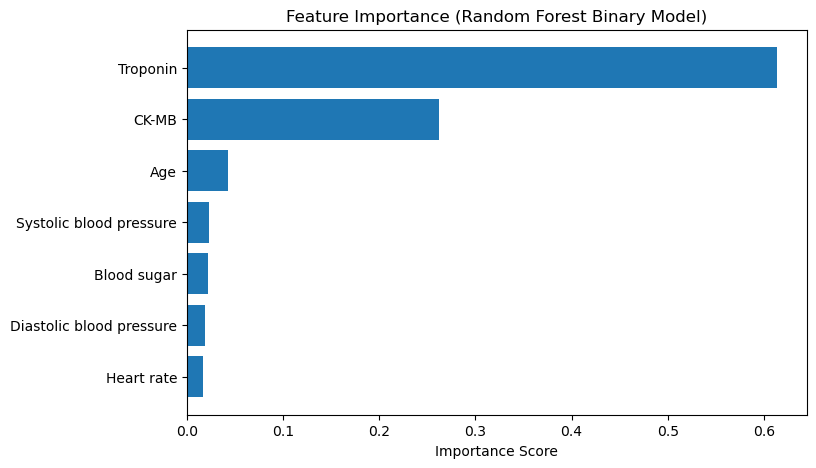

In [98]:
#1. Load and Prepare Data
#🔹 Feature Importance
#Identify which features most influence predictions (e.g., troponin, CK-MB, BP).
#Use model-based or SHAP explanations for interpretability.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Encode categorical targets
df['Result_Num'] = df['Result'].map({'negative': 0, 'positive': 1})
df['Risk_Level_Num'] = df['Risk_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Features and targets
features = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
            'Blood sugar', 'CK-MB', 'Troponin']
X = df[features]
y_binary = df['Result_Num']
y_multi = df['Risk_Level_Num']

# Train–test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
_, _, y_train_mul, y_test_mul = train_test_split(X, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use Random Forest for importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_bin)

# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance (Random Forest Binary Model)")
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), names)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


### **Observation:** *Troponin importance score is the highest, the distribution based on the threshold justifies the same.*

In [99]:
# Troponin thresholds
thresholds = [0.0, 0.05, 0.1]  # Normal, elevated, highly elevated
for t in thresholds:
    print(f"Troponin > {t:.3f} ng/mL:")
    print(df[df['Troponin'] > t]['Risk_Level'].value_counts(normalize=True))
    print()

Troponin > 0.000 ng/mL:
Risk_Level
High        0.615618
Low         0.208491
Moderate    0.175891
Name: proportion, dtype: float64

Troponin > 0.050 ng/mL:
Risk_Level
High        1.0
Moderate    0.0
Low         0.0
Name: proportion, dtype: float64

Troponin > 0.100 ng/mL:
Risk_Level
High        1.0
Moderate    0.0
Low         0.0
Name: proportion, dtype: float64



---
## ✅ 2.Does the distribution of a numeric variable (e.g., Troponin, Blood sugar, etc.) differ significantly across the three Risk_Level groups? 

---
🔬 Step 3A: ANOVA Test (parametric)
Use if your data is normally distributed and variances are similar:



In [100]:
from scipy.stats import f_oneway

# List of all numeric columns except the encoded Risk_Level
numeric_cols = df.select_dtypes(include='number').columns.drop(['Gender','Heart rate', 'Age'])

print("ANOVA Test Results:\n")
for col in numeric_cols:
    groups = [df[df['Risk_Level'] == level][col] for level in df['Risk_Level'].unique()]
    stat, p = f_oneway(*groups)
    print(f"{col}: F = {stat:.4f}, p = {p:.4f} {'(Significant)' if p < 0.05 else ''}")


ANOVA Test Results:

Systolic blood pressure: F = 106.1142, p = 0.0000 (Significant)
Diastolic blood pressure: F = 37.5516, p = 0.0000 (Significant)
Blood sugar: F = 70.1663, p = 0.0000 (Significant)
CK-MB: F = 32.4841, p = 0.0000 (Significant)
Troponin: F = 41.1661, p = 0.0000 (Significant)
Result_Num: F = 102433.9879, p = 0.0000 (Significant)


---
🔬 Step 3B: Kruskal-Wallis Test (non-parametric)
Use if data isn't normally distributed or variances differ:

---

In [101]:
from scipy.stats import kruskal 
numeric_cols = df.select_dtypes(include='number').columns.drop(['Gender','Heart rate', 'Age'])
print("Kruskal-Wallis Test Results:\n")
for col in numeric_cols:
    groups = [df[df['Risk_Level'] == level][col] for level in df['Risk_Level'].unique()]
    stat, p = kruskal(*groups)
    print(f"{col}: H = {stat:.4f}, p = {p:.4f} {'(Significant)' if p < 0.05 else ''}")

Kruskal-Wallis Test Results:

Systolic blood pressure: H = 181.8995, p = 0.0000 (Significant)
Diastolic blood pressure: H = 65.5749, p = 0.0000 (Significant)
Blood sugar: H = 90.0288, p = 0.0000 (Significant)
CK-MB: H = 118.1653, p = 0.0000 (Significant)
Troponin: H = 591.3447, p = 0.0000 (Significant)
Result_Num: H = 1309.5877, p = 0.0000 (Significant)


---
## ✅ 3. Do males and females present different risk patterns even at similar biomarker levels?


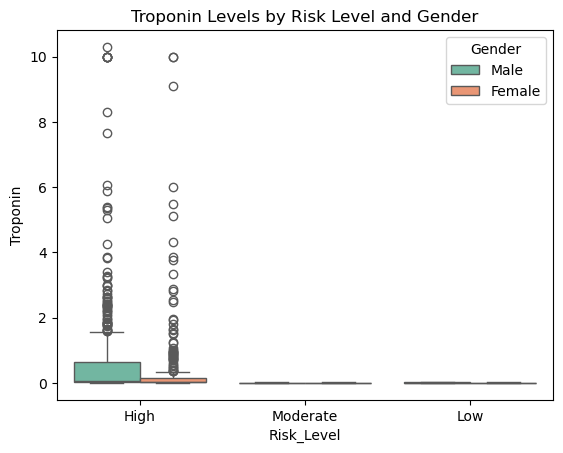

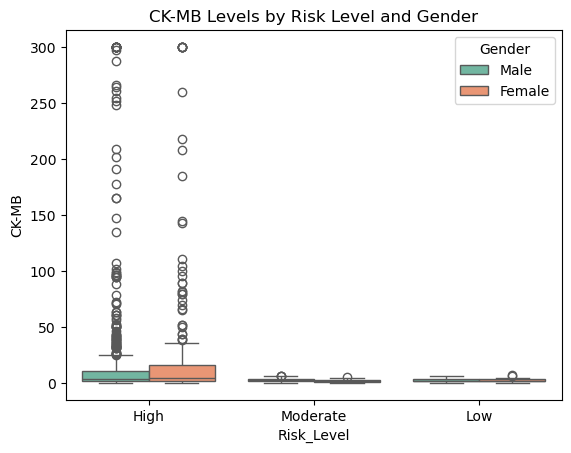

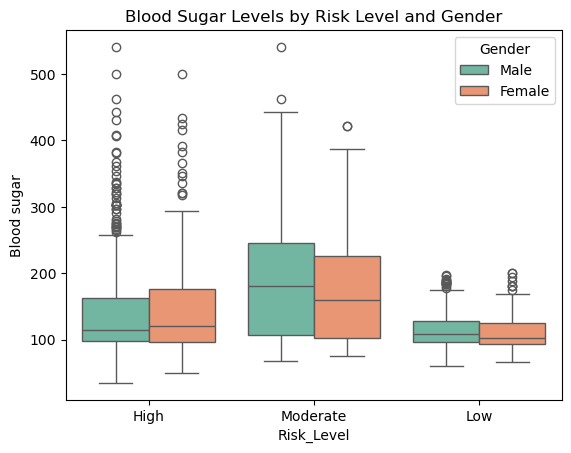

In [102]:
#🔹 Step-by-Step Approach:

# 🔹 Step 1: Map gender codes to labels
df['Gender'] = df['Gender'].map({0: 'Female', 1: 'Male'})

# 🔹 Step 2: Make sure 'Risk_Level' is ordered
df['Risk_Level'] = pd.Categorical(df['Risk_Level'], categories=['High', 'Moderate', 'Low'], ordered=True)

# 🔹 Step 3: Optional - drop rows with missing values in relevant columns
df = df.dropna(subset=['Gender', 'Risk_Level', 'Troponin', 'CK-MB', 'Blood sugar'])

# 🔹 Step 4: Plot Troponin levels by Risk Level and Gender
sns.boxplot(data=df, x='Risk_Level', y='Troponin', hue='Gender', palette='Set2')
plt.title('Troponin Levels by Risk Level and Gender')
plt.show()

# 🔹 Step 5: Plot CK-MB levels
sns.boxplot(data=df, x='Risk_Level', y='CK-MB', hue='Gender', palette='Set2')
plt.title('CK-MB Levels by Risk Level and Gender')
plt.show()

# 🔹 Step 6: Plot Blood Sugar levels
sns.boxplot(data=df, x='Risk_Level', y='Blood sugar', hue='Gender', palette='Set2')
plt.title('Blood Sugar Levels by Risk Level and Gender')
plt.show()

***Observation:** 
**Evidence for different patterns:***

Males and females show similar biomarkers in some cases, yet fall into different risk levels.  
There could be  ***gender-based variation in how risk is evaluated or manifests, even at similar biomarker levels***.   
It might reflect:
- Biological differences in response to cardiac stress.
- Differences in baseline levels.

---
**End of Notebook**
